In [1]:
import matplotlib.pyplot as plt

In [70]:
import numpy as np
import random

N = 100     # size of the problem is N x N                                      
steps = 3000    # total number of iterations                                        
tracks = 50

# generate a landscape with multiple local optima                                          
def generator(x, y, x0=0.0, y0=0.0):
    return np.sin((x/N-x0)*np.pi)+np.sin((y/N-y0)*np.pi)+\
        .07*np.cos(12*(x/N-x0)*np.pi)+.07*np.cos(12*(y/N-y0)*np.pi)

x0 = np.random.random() - 0.5
y0 = np.random.random() - 0.5
h = np.fromfunction(np.vectorize(generator), (N, N), x0=x0, y0=y0, dtype=int)
peak_x, peak_y = np.unravel_index(np.argmax(h), h.shape)

# starting points                                                               
x = np.random.randint(0, N, tracks)
y = np.random.randint(0, N, tracks)

def main():
    global x
    global y

    for step in range(steps):
        # add a temperature schedule here
#         T = max(1e-03, ((steps - step)/steps)**3-.005)
        T = max(1e-03, np.cos(np.pi *step/steps) +1) /2
        # update solutions on each search track                                     
        for i in range(tracks):
            # try a new solution near the current one                               
            x_new = np.random.randint(max(0, x[i]-2), min(N, x[i]+2+1))
            y_new = np.random.randint(max(0, y[i]-2), min(N, y[i]+2+1))
            S_old = h[x[i], y[i]]
            S_new = h[x_new, y_new]
            
            prob = np.exp((S_new - S_old)/T)
            
            # change this to use simulated annealing
            if random.random() < prob:
                x[i], y[i] = x_new, y_new   # new solution is better, go there       
            else:
                pass                        # if the new solution is worse, do nothing

    # Number of tracks found the peak
    print(sum([x[j] == peak_x and y[j] == peak_y for j in range(tracks)])) 
main()

27


In [71]:
for i in range(10):
    main()

19
20
17
26
19
23
22
17
21
25


In [39]:
x = []
for step in range(steps):
    T = max(0, ((steps - step)/steps)**3-.005)
    x.append(T)

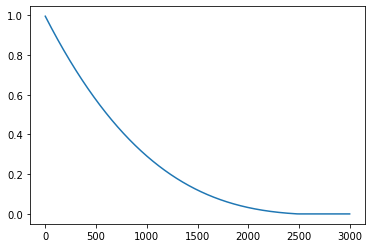

In [40]:
plt.plot(x)
plt.show()

In [66]:
x2 = []
for step in range(steps):
    T = max(1e-03, np.cos(np.pi *step/steps) +1) /2
    x2.append(T)
#     print(T)

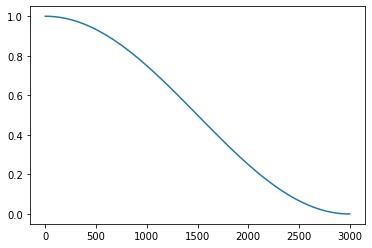

In [67]:
plt.plot(x2)
plt.show()